In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Loading Train and Test data
filepath_train = r"Datasets/archive/fashion-mnist_test.csv"
filepath_test = r"Datasets/archive/fashion-mnist_test.csv"
dataset_train = pd.read_csv(filepath_train)
dataset_test = pd.read_csv(filepath_test)

In [6]:
dataset_train.shape

(10000, 785)

In [7]:
dataset_test.shape

(10000, 785)

In [8]:
dataset_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [9]:
dataset_test.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [10]:
dataset_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
dataset_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Assigning Train and Test data
x_train=dataset_train.drop(columns=['label'])
y_train=dataset_train['label']

x_test=dataset_test.drop(columns=['label'])
y_test=dataset_test['label']

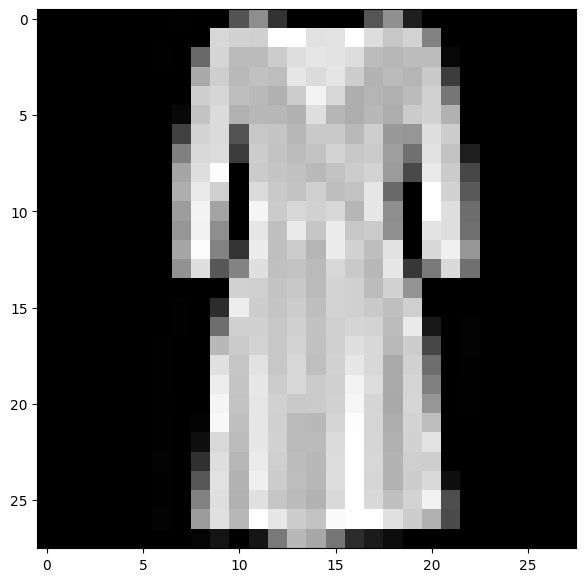

In [14]:
# Ploting sample image from a index
plt.figure(figsize=(7,7))
index = 10
grid_data = x_train.iloc[index].values.reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()

In [15]:
# Normalizing the Train data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [16]:
# initialised K Means Clustering by taking n as 10
kmeans = KMeans(n_clusters=10,init='random',random_state=42)
kmeans.fit(x_train_scaled)

KMeans(init='random', n_clusters=10, random_state=42)

In [17]:
# Getting and Printing Cluster Points
cluster_centers = kmeans.cluster_centers_
cluster_labels_train = kmeans.predict(x_train_scaled)
cluster_counts = np.bincount(cluster_labels_train)
for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx}: {count} points")

Cluster 0: 1067 points
Cluster 1: 1492 points
Cluster 2: 1297 points
Cluster 3: 369 points
Cluster 4: 829 points
Cluster 5: 397 points
Cluster 6: 413 points
Cluster 7: 1302 points
Cluster 8: 1536 points
Cluster 9: 1298 points


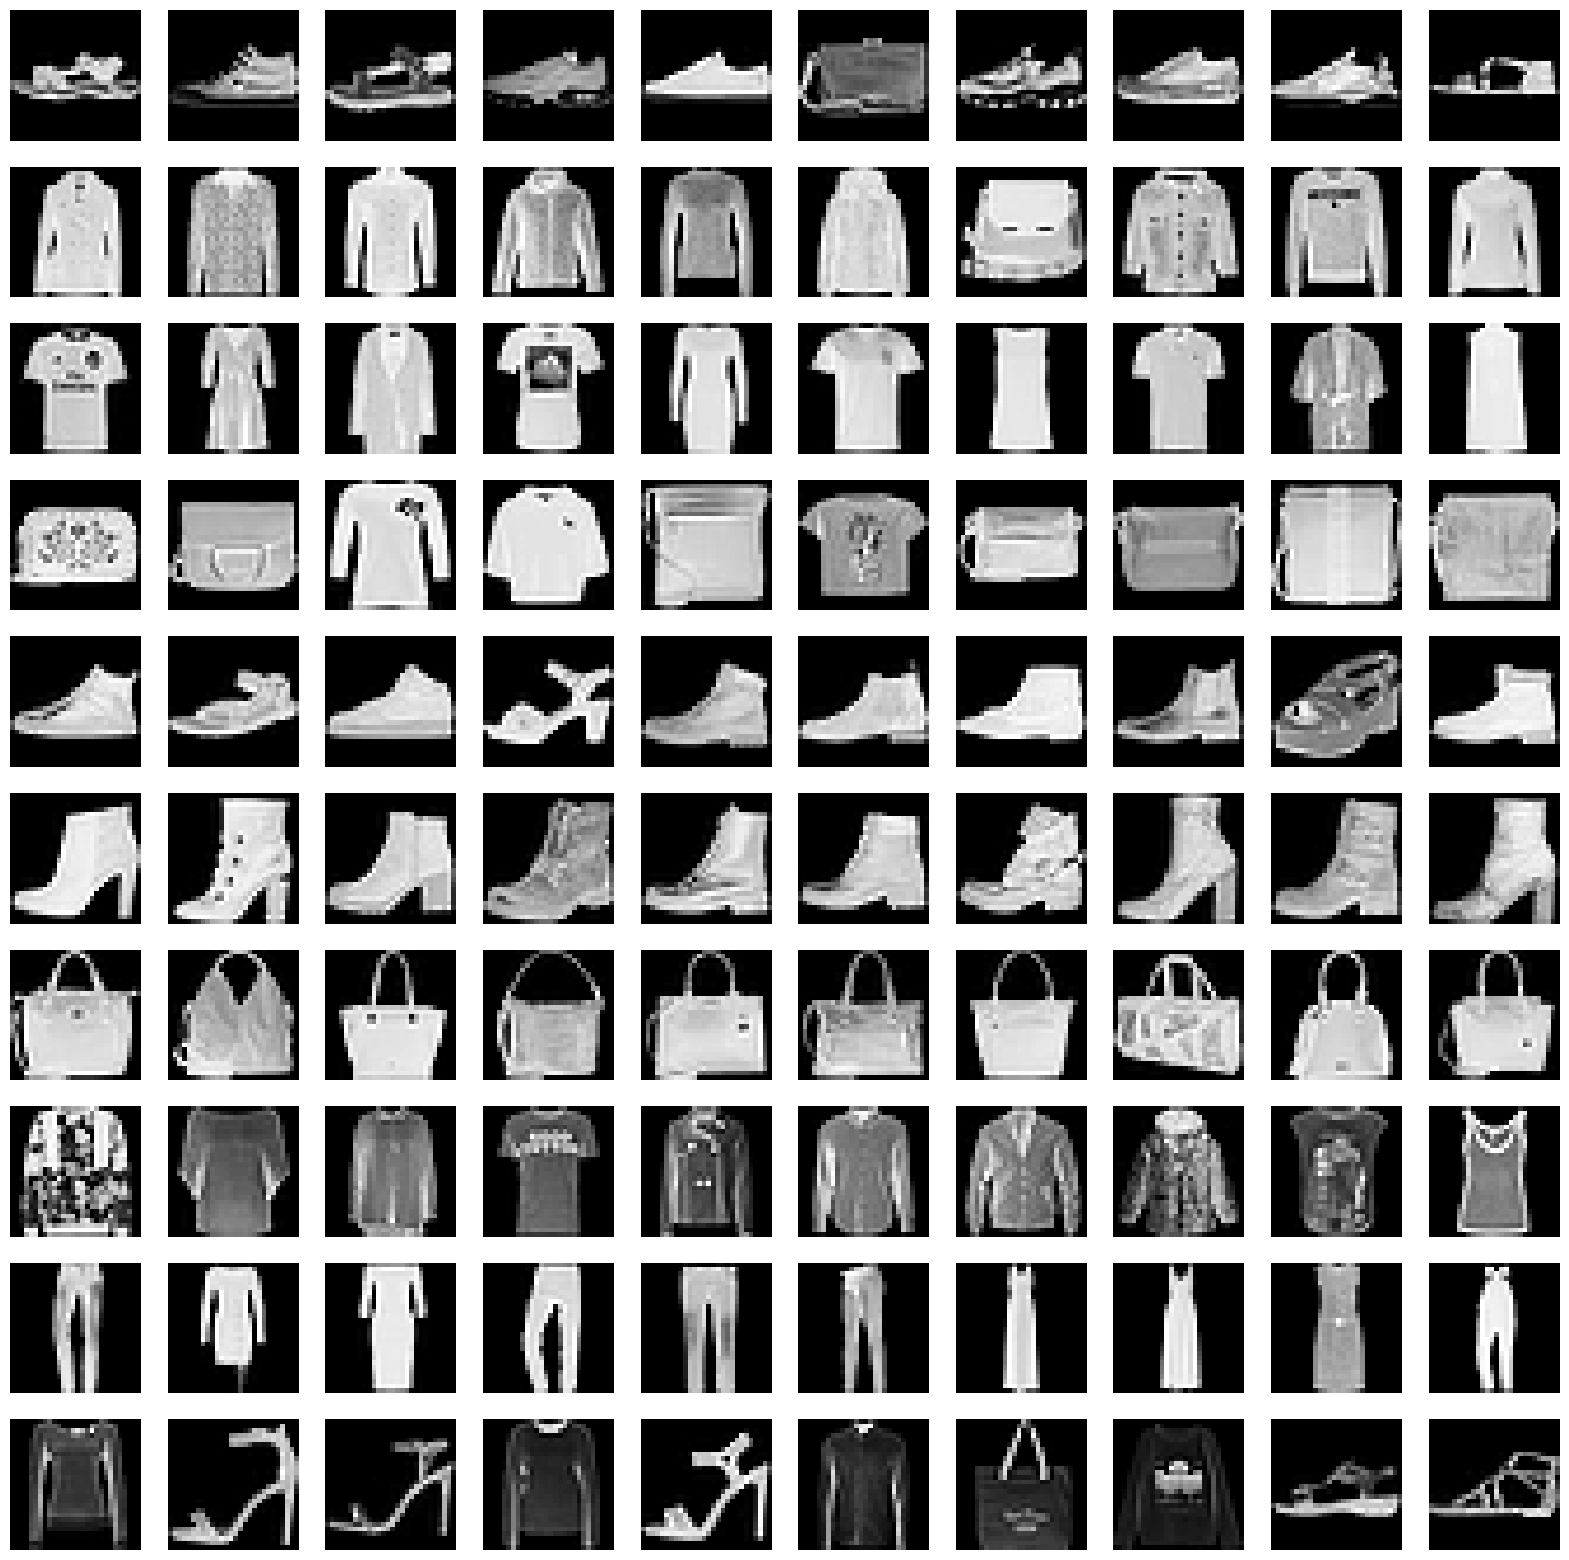

In [18]:
# Visulazing 10 Images
plt.figure(figsize=(20,20))
for i in range(10):
    cluster_indices = np.where(cluster_labels_train==i)[0][:10]
    for j, index in enumerate(cluster_indices):
        plt.subplot(10,10,i * 10 + j + 1)
        grid_data = x_train.iloc[index].values.reshape((28,28)).astype(int)
        plt.imshow(grid_data, interpolation="none",cmap="gray")
        plt.axis('off')
plt.show()

In [19]:
sse_part_a = kmeans.inertia_

In [20]:
# Training another k-means with 10 images from each class as initializations
images_perclass = 10
selected_images = []
for i in range(10):
    indices = np.where(y_train==i)[0][:images_perclass]
    selected_images.extend(x_train.iloc[indices].values)

selected_images = np.array(selected_images)

scaler = StandardScaler()
selected_images_scaled = scaler.fit_transform(selected_images)

#reshaping_images = selected_images_scaled.reshape(10,images_perclass,-1)
reshaping_images = selected_images_scaled.reshape(-1, 784)

In [24]:
kmeans = KMeans(n_clusters=100,init=reshaping_images,n_init=1,random_state=42)
kmeans.fit(x_train_scaled)

KMeans(init=array([[ 0.        ,  0.        , -0.10050378, ..., -0.19711148,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.10050378, ..., -0.19711148,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.10050378, ..., -0.19711148,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.10050378, ..., -0.19711148,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.10050378, ..., -0.19711148,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.10050378, ..., -0.19711148,
         0.        ,  0.        ]]),
       n_clusters=100, n_init=1, random_state=42)

In [22]:
cluster_labels_train = kmeans.predict(x_train_scaled)

cluster_counts = np.bincount(cluster_labels_train)
for cluster_idx, count in enumerate(cluster_counts):
    print(f"Cluster {cluster_idx}: {count} points")

Cluster 0: 38 points
Cluster 1: 160 points
Cluster 2: 140 points
Cluster 3: 98 points
Cluster 4: 16 points
Cluster 5: 146 points
Cluster 6: 135 points
Cluster 7: 153 points
Cluster 8: 178 points
Cluster 9: 28 points
Cluster 10: 145 points
Cluster 11: 47 points
Cluster 12: 46 points
Cluster 13: 116 points
Cluster 14: 66 points
Cluster 15: 80 points
Cluster 16: 43 points
Cluster 17: 164 points
Cluster 18: 132 points
Cluster 19: 91 points
Cluster 20: 34 points
Cluster 21: 2 points
Cluster 22: 12 points
Cluster 23: 106 points
Cluster 24: 31 points
Cluster 25: 208 points
Cluster 26: 110 points
Cluster 27: 128 points
Cluster 28: 150 points
Cluster 29: 115 points
Cluster 30: 88 points
Cluster 31: 105 points
Cluster 32: 73 points
Cluster 33: 103 points
Cluster 34: 92 points
Cluster 35: 92 points
Cluster 36: 125 points
Cluster 37: 221 points
Cluster 38: 102 points
Cluster 39: 132 points
Cluster 40: 146 points
Cluster 41: 45 points
Cluster 42: 72 points
Cluster 43: 151 points
Cluster 44: 35 poin

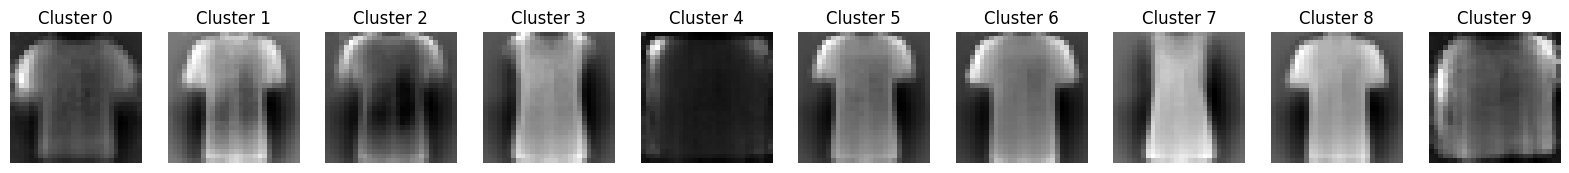

In [25]:
cluster_centers = kmeans.cluster_centers_

plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(1,10,i+1)
    center_images = cluster_centers[i].reshape((28,28))
    plt.imshow(center_images,cmap="gray")
    plt.title(f"Cluster {i}")
    plt.axis('off')

plt.show()

In [26]:
sse_part_d = kmeans.inertia_

In [27]:
# Evaluting and printing Sum of Squared Error 2 different clusters
print("Sum of Squared Error (SSE) for Part (a):", sse_part_a)
print("Sum of Squared Error (SSE) for Part (d):", sse_part_d)

Sum of Squared Error (SSE) for Part (a): 4355355.584471144
Sum of Squared Error (SSE) for Part (d): 2835015.1169148656
